# 7.3 Smooth steep functions
see https://arxiv.org/abs/2305.00066

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd, orth, qr
from scipy.optimize import curve_fit
from numpy import sin, cos, pi
cmap = plt.cm.plasma

In [2]:
from initial_conditions import Domain, Heaviside, LinearRamp, SmoothRamp, Sigmoid, CkRamp
from basis_functions import SVD, Trigonometric, Trigonometric2, TrigonometricOdd, Greedy, LNA, LPF, Sinc, Fourier

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
page_width_pt = 455.24
pt2in = 0.01389 
pt2cm = 0.0352777778
cm2in = 1/2.54
plot_width_in = page_width_pt*pt2in/2
print(plot_width_in/cm2in)

fs = 10
fs_lbl = 6
plt.rcParams["figure.figsize"] = (plot_width_in, plot_width_in/1.61803398875)
plt.rcParams["figure.autolayout"] = True
plt.rcParams['font.size'] = fs
plt.rcParams['axes.titlesize'] = fs
plt.rcParams['axes.labelsize'] = fs
plt.rcParams['xtick.labelsize'] = fs
plt.rcParams['ytick.labelsize'] = fs
plt.rcParams['legend.labelspacing'] = 0.0
plt.rcParams['legend.fontsize'] = fs_lbl
plt.rcParams['legend.handlelength'] = 1.0

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
mpl.rc('text', usetex=True)
mpl.rc('font', family='serif', size=12, serif='Computer Modern Roman')
pth = "../Plots/"

8.030570172000001


In [4]:
VALIDATE = False

In [5]:
m, n, r = 2500, 2500, 2500
x = Domain([0, 1], m)
mu = Domain([0, 1], n)

## generate smooth ramps and fit them to the linear ramp to make for a good comparison

In [6]:
#initc = [u_hs, u_lr, u_sr, u_C1, u_C2, u_C3, u_C4, u_C5, u_sg]
#basis = [svd_basis, trig_basis, greedy_basis, lna_basis, lpf_basis]
# 9 initial conditions
# 5 basis
# 4 errors
# r entries

results = np.zeros((6, 9, 4, r))
epsilon = 0.025
u_hs = Heaviside()
u_C0 = CkRamp(epsilon, 0)
u_C1 = CkRamp(epsilon, 1)
u_C2 = CkRamp(epsilon, 2)
u_C3 = CkRamp(epsilon, 3)
u_C4 = CkRamp(epsilon, 4)
u_C5 = CkRamp(epsilon, 5)
u_sg = Sigmoid(epsilon)

initc = [u_C0, u_C1, u_C2, u_C3, u_C4, u_C5, u_sg]
tt = np.linspace(0, 1, 10000)
for j, u_k in enumerate(initc[1:]):  # 9
    print(u_k.name)
    u_k.fit_to(u_C0, tt)

smooth ramp, $C^1$
mu_test =  0.5000500050005001
epsilon =  0.03316168328741189
cov =  [[7.34920826e-10]]
smooth ramp, $C^2$
mu_test =  0.5000500050005001
epsilon =  0.04001922754234522
cov =  [[1.92915843e-09]]
smooth ramp, $C^3$
mu_test =  0.5000500050005001
epsilon =  0.04591862571115181
cov =  [[3.22181004e-09]]
smooth ramp, $C^4$
mu_test =  0.5000500050005001
epsilon =  0.05116043398053234
cov =  [[4.55007091e-09]]
smooth ramp, $C^5$
mu_test =  0.5000500050005001
epsilon =  0.0559208586827702
cov =  [[5.89521541e-09]]
sigmoid, $C^\infty$
mu_test =  0.5000500050005001
epsilon =  0.019789519904034873
cov =  [[1.19085129e-09]]


## Fig. 3: Ramp functions with varying smoothness $C^k$.

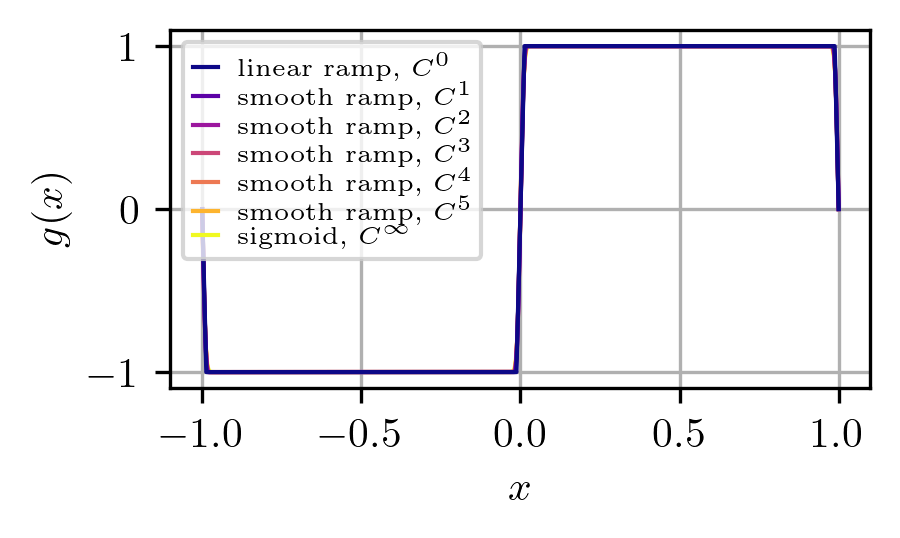

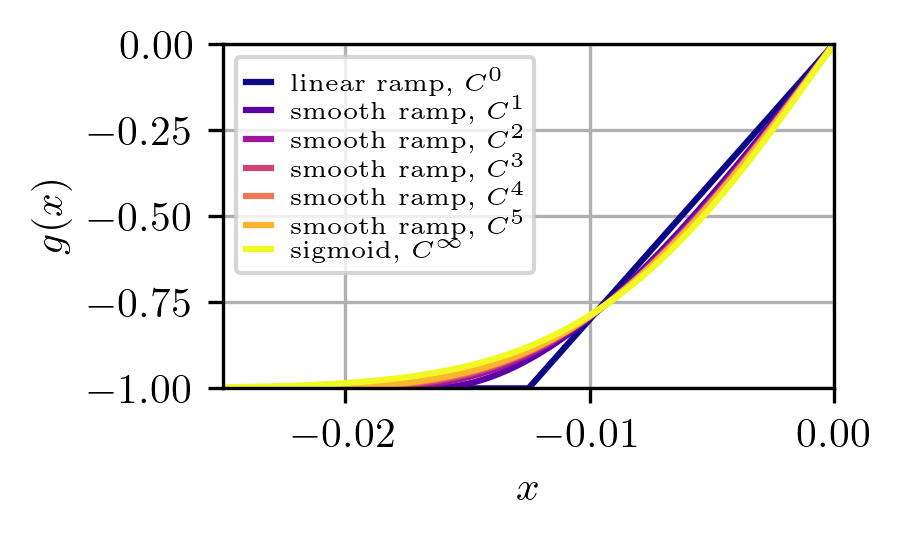

In [7]:
fig, ax = plt.subplots(tight_layout=True)
for i, ic in enumerate(initc):
    color = cmap(i/6)
    ic.plot(x(), ax=ax, lw=1, label=ic.name, color=color, zorder=5-i)
#plt.xlim(-1, 1)
plt.grid()
plt.legend()
plt.savefig(pth+"ramps.pdf")
plt.show()


fig, ax = plt.subplots(tight_layout=True)
for i, ic in enumerate(initc):
    color = cmap(i/6)
    ic.plot(x(), ax=ax, ms=1, label=ic.name, color=color)
plt.xlim(-.025, 0)
plt.ylim(-1, -.0)
plt.legend()
plt.grid()
plt.savefig(pth+"ramps2.pdf")
plt.show()

## generate the basis, sort it for each snapshot matrix and calculate the error

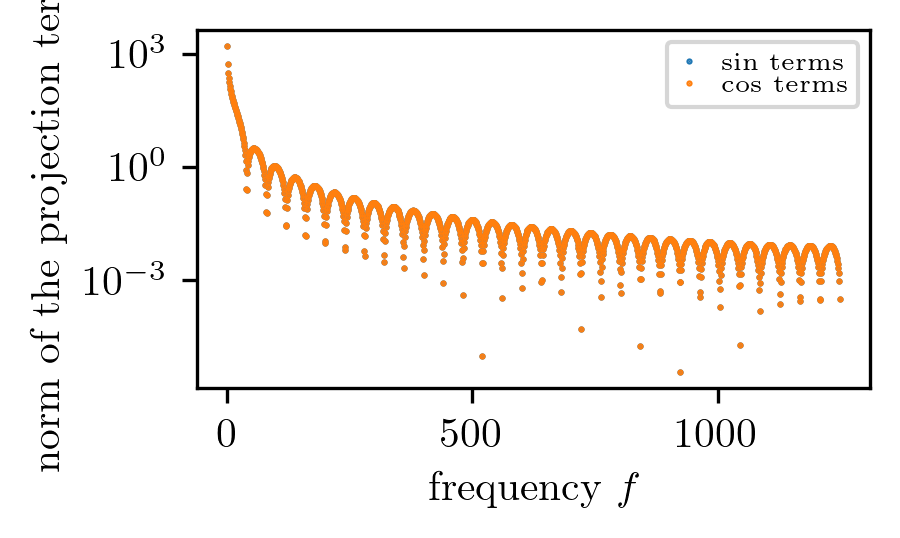

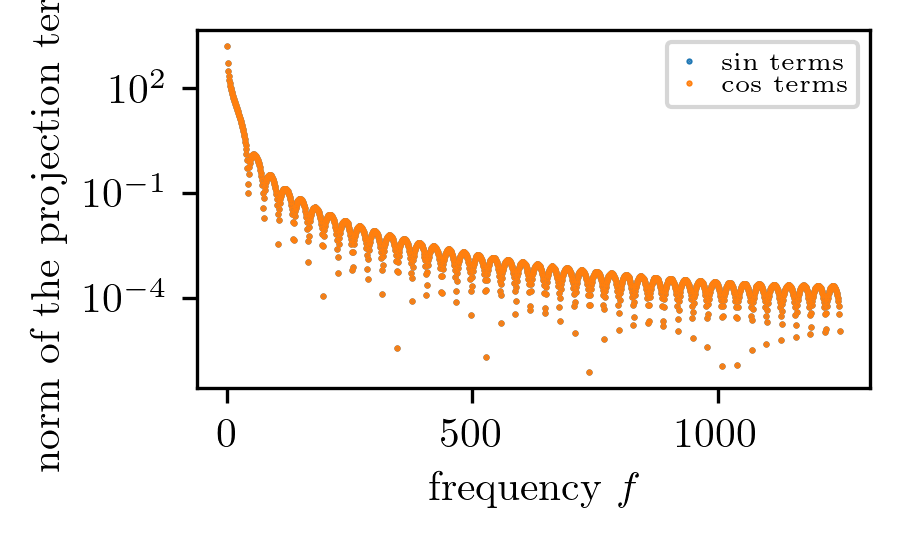

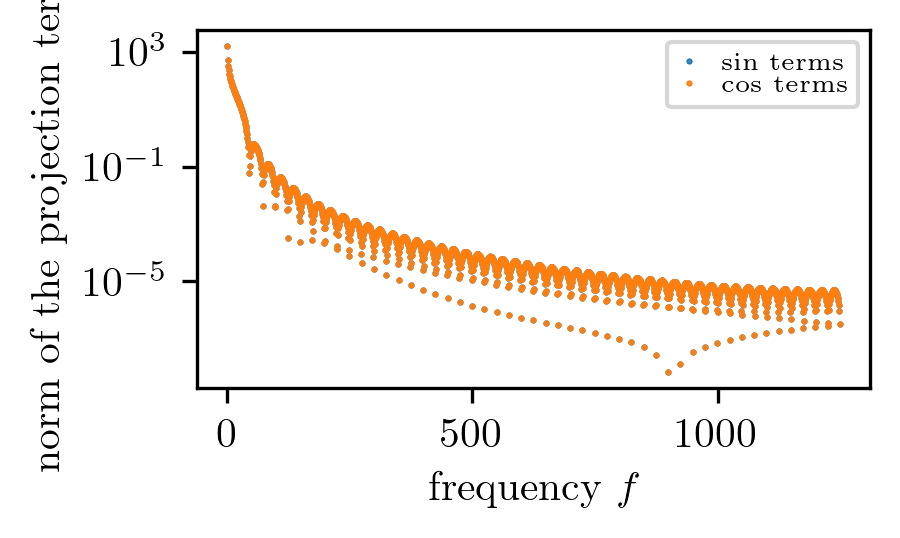

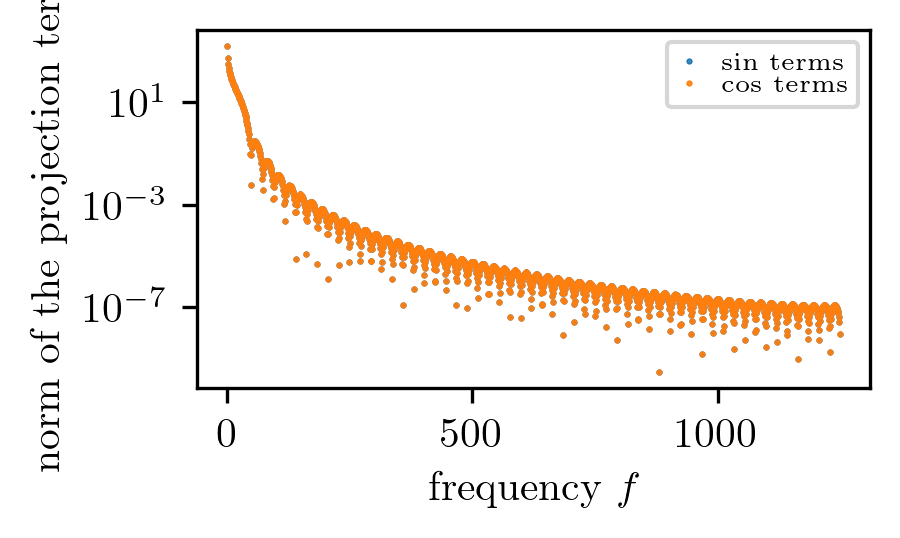

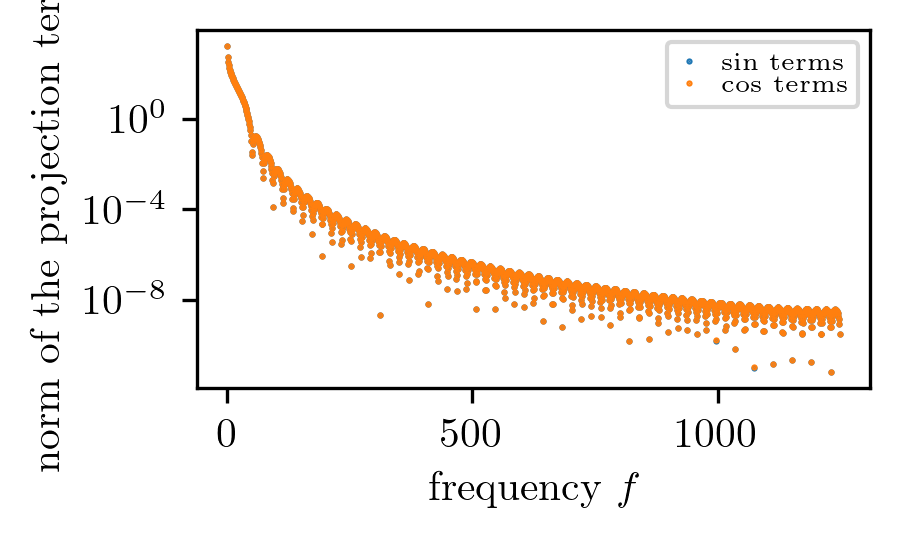

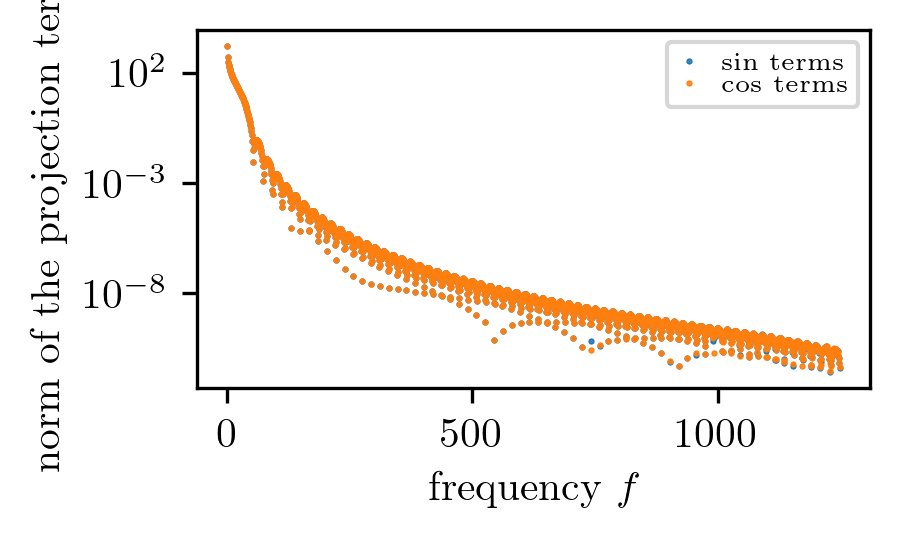

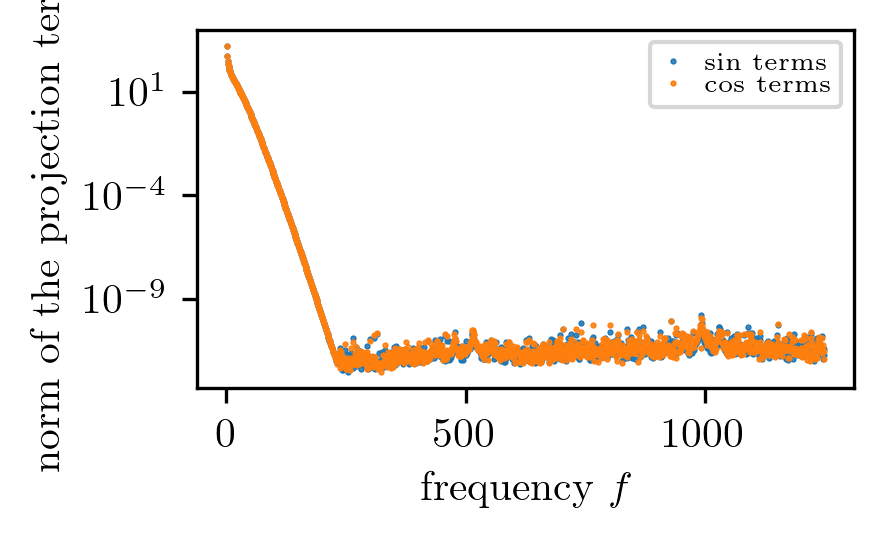

In [8]:
trig_basis_odd = TrigonometricOdd(x())

delta_Ns = np.zeros((len(initc), r))
if VALIDATE:
    d_Ns = np.zeros((len(initc), r))
    delta_Ns2 = np.zeros((len(initc), r))
for j, u_k in enumerate(initc):  # 9
    X = u_k.half_wave_odd(x(), mu())
    trig_basis_odd.sort(X)

    delta_N, S = trig_basis_odd.calc_error_analytic(X)
    delta_Ns[j] = delta_N

    if VALIDATE:
        svd_basis = SVD(X)  # slow
        delta_n2, d_N = svd_basis.calc_error(X)  # very slow
        delta_Ns2[j] = delta_n2
        d_Ns[j] = d_N

## Fig. 4: $N$ -width for ramps with varying regularity.

linear ramp, $C^0$ 0 1.5
5.28E+00
smooth ramp, $C^1$ 1 2.5
1.82E+02
smooth ramp, $C^2$ 2 3.5
8.16E+03
smooth ramp, $C^3$ 3 4.5
4.47E+05
smooth ramp, $C^4$ 4 5.5
2.95E+07
smooth ramp, $C^5$ 5 6.5
2.17E+09


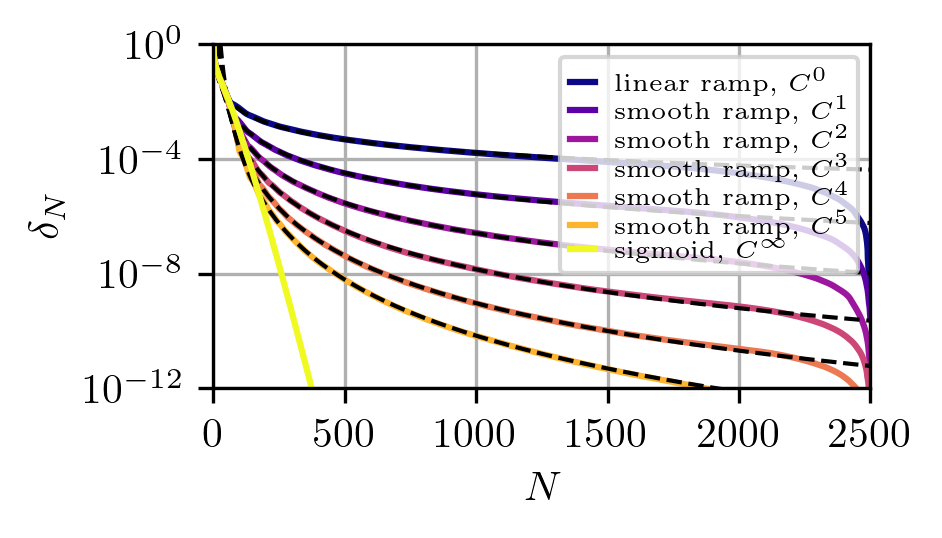

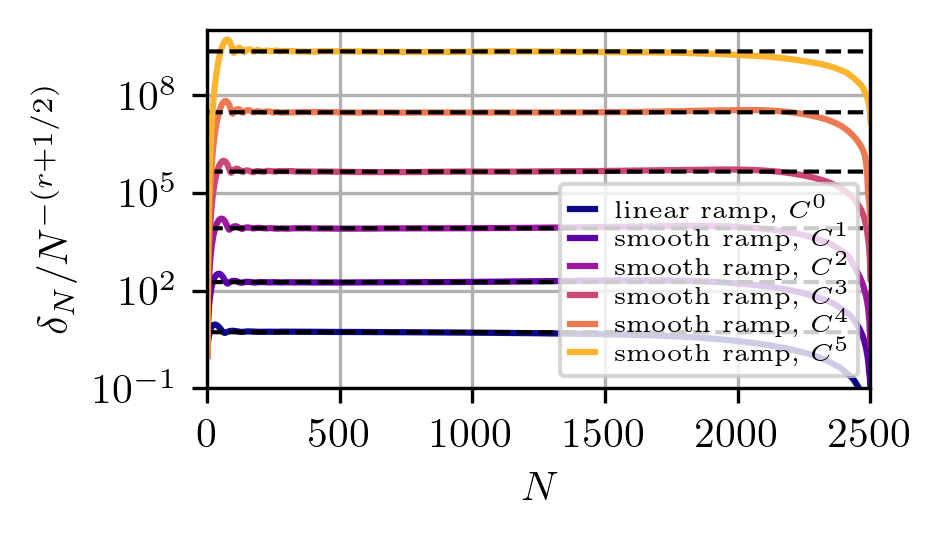

In [9]:
N = np.arange(1, r+1)
fig, ax = plt.subplots(tight_layout=True)
fig2, ax2 = plt.subplots(tight_layout=True)
for j, u_k in enumerate(initc):
    color = cmap(j/6)
    ax.plot(N[:-1], delta_Ns[j][1:], "-", color=color, ms=1, label=u_k.name)
    if VALIDATE:
        ax.plot(N, delta_Ns2[j], ".", color="g", ms=2)
        ax.plot(N, d_Ns[j], ".", color="r", ms=2)
    if not u_k.name.startswith("sigmoid"):
        k = j
        print(u_k.name, j, (2*k+3)/2)
        model = 1 * N**(-(2*k+3)/2)  #1/np.pi**(k+2)
        C = delta_Ns[j]/model
        C_estimated = np.mean(C[100: r//2])

        ax2.plot(N, C, color=color, label=u_k.name)
        #ax2.plot(N[:-1], delta_Ns[j][1:]/model[:-1], "k--")
        ax2.plot(N, np.ones_like(N)*C_estimated, "k--", lw=1)
        ax.plot(N, C_estimated*model, "k--", lw=1, ms=0)
        #ax.plot(N, model, "--", color=color, ms=0)
        print("{:.2E}".format(C_estimated))
ax.set_yscale('log')
ax.legend()
ax.set_xlabel(r'$N$')
ax.set_ylabel(r'$\delta_N$')
ax.set_xlim([0, r])
ax.set_ylim([1e-12, 1e0])

ax2.legend(loc='lower right')
ax2.set_yscale('log')
ax2.set_xlim([0, r])
ax2.set_ylim([1e-1, 1e10])
ax2.set_xlabel(r'$N$')
ax2.set_ylabel(r'$c_r$')
ax2.set_ylabel(r'$\delta_{N} / N^{-(r+1 / 2)}$')

ax.grid()
ax2.grid()

fig.savefig(pth+"d_N_C_k.pdf")
fig2.savefig(pth+"C_C_k_v2.pdf")
plt.show()

In [10]:
n = "a"